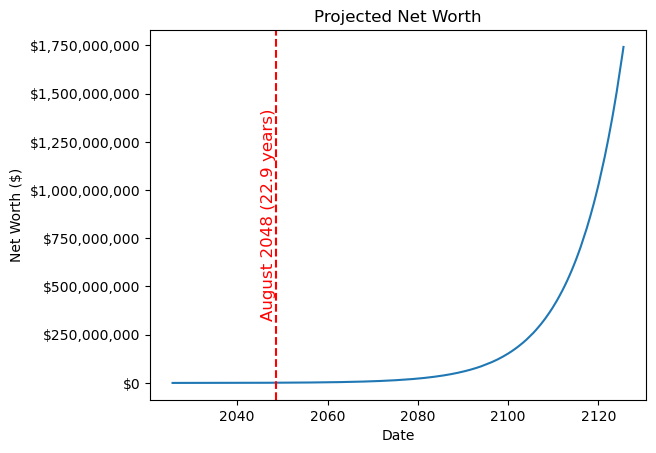

In [ ]:
%matplotlib inline
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from net_worth_utils import project_net_worth, find_net_worth_milestone

# Parameters
start_net_worth = 1_000
income_streams = [
    {
        "monthly_income": 5_000,  # Monthly salary
        "annual_growth_rate": 0,  # Annual growth rate of salary
        "terminal_value": 5_000,  # Terminal value of salary
    },
]
monthly_expenses = 4_000
annual_interest_rate=0.1  # Expected annual return (e.g., S&P 500 average)
net_worth_target = 1_000_000  # Target net worth milestone

# Project net worth over time.
df = project_net_worth(start_net_worth, annual_interest_rate,
    income_streams, monthly_expenses, years=100)

# Find the date when the net worth milestone is reached.
milestone_date = find_net_worth_milestone(df, net_worth_target)

# Plot the projected net worth.
plt.plot(df["Date"], df["Net Worth"])
plt.title("Projected Net Worth")
plt.xlabel("Date")
plt.ylabel("Net Worth ($)")
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

# Annotate the net worth milestone if reached.
if milestone_date is not None:
    today = datetime.today()
    years_until_target = (milestone_date - today).days / 365.25
    milestone_text = f"{milestone_date.strftime('%B %Y')} ({years_until_target:.1f} years)"
    y_mid = plt.ylim()[0] + (plt.ylim()[1] - plt.ylim()[0]) / 2
    plt.axvline(x=milestone_date, color='red', linestyle='--')
    plt.text(milestone_date, y_mid, milestone_text, color='red',
             fontsize=12, rotation=90, va='center', ha='right')

plt.show()